In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


# Linear SVM

In [3]:
iris = datasets.load_iris()

X = iris["data"][:,(2,3)] #petal length, petal width
y = (iris["target"] == 2).astype(np.float64) #iris virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge")),
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [4]:
svm_clf.predict([[5.5,1.7]])


array([1.])

In [5]:
# similar to  LinearSVC(C = 1, loss = "hinge")

# SVC(kernel="linear", C=1)

# SGDClassifier(loss="hinge", alpha=1/(m*C)) 
# its slower but good for out-of-core training

### moon dataset
####  toy dataset for binary classification in which the data points are shaped as two interleaving half circles

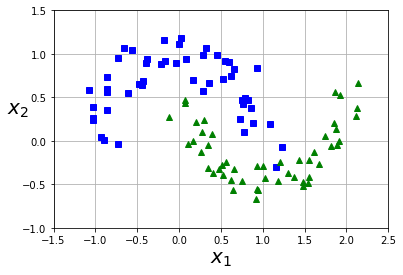

In [4]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X,y = make_moons(n_samples = 100 , noise = 0.15)

#plot
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()



In [ ]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C = 10, loss = "hinge"))
])

polynomial_svm_clf.fit(X,y)

### kernel polynomial 
#### to add a new feature which is combination of the others to seperate and add dimention

In [8]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
 ])

poly_kernel_svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

### Gaussian RBF kernel
#### use gaussian similarity to create new combined features

In [9]:
rbf_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
 ])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

### there are other kernels which are rare

# SVM Regression

In [5]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X,y)


LinearSVR(epsilon=1.5)

In [6]:
### non linear

from sklearn.svm import SVR

svm_poly_reg = SVR(kernel ="poly"
                  , degree = 2
                  , C = 100
                  , epsilon = 0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')